In [11]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

In [12]:
# G2 >> scene
# G1 >> obj

In [13]:
sift = cv2.xfeatures2d.SIFT_create() # opencv 3

I2 = cv2.imread('../Data/scene.jpg')
G2 = cv2.cvtColor(I2,cv2.COLOR_BGR2GRAY)

keypoints2, desc2 = sift.detectAndCompute(G2, None); # opencv 3

fnames = glob.glob('../Data/obj?.jpg')
fnames.sort()

In [14]:
G2.shape

(786, 800)

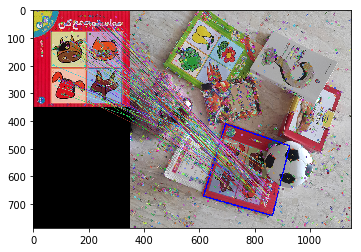

In [15]:
# for fname in fnames:
fname = fnames[0]

I1 = cv2.imread(fname)
G1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)
keypoints1, desc1 = sift.detectAndCompute(G1, None); # opencv 3

# brute-force matching
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc1,desc2, k=2)

# distance ratio test
alpha = 0.75
good_matches = [m1 for m1,m2 in matches if m1.distance < alpha *m2.distance]

points1 = [keypoints1[m.queryIdx].pt for m in good_matches]
points1 = np.array(points1,dtype=np.float32)

points2 = [keypoints2[m.trainIdx].pt for m in good_matches]
points2 = np.array(points2,dtype=np.float32)

H, mask = cv2.findHomography(points1, points2, cv2.RANSAC,5.0)

mask = mask.ravel().tolist()
good_matches = [m for m,msk in zip(good_matches,mask) if msk == 1]

outP_x, outP_y = G1.shape[1], G1.shape[0]; 

pts = np.float32([ [0,0],
                   [0,outP_y],
                   [outP_x,outP_y],
                   [outP_x,0] ]).reshape(-1,1,2) # this needs to be changed

dst = cv2.perspectiveTransform(pts,H).reshape(4,2)
# H @ point   for each point in pts

J = I2.copy()
cv2.line(J, (int(dst[0,0]), int(dst[0,1])), (int(dst[1,0]), int(dst[1,1])), (255,0,0),3)
cv2.line(J, (int(dst[1,0]), int(dst[1,1])), (int(dst[2,0]), int(dst[2,1])), (255,0,0),3)
cv2.line(J, (int(dst[2,0]), int(dst[2,1])), (int(dst[3,0]), int(dst[3,1])), (255,0,0),3)
cv2.line(J, (int(dst[3,0]), int(dst[3,1])), (int(dst[0,0]), int(dst[0,1])), (255,0,0),3)

I = cv2.drawMatches(I1,keypoints1,J,keypoints2,good_matches, None)

plt.imshow(I[:,:,::-1])
plt.show()

In [ ]:
# for fname in fnames:

#     I1 = cv2.imread(fname)
#     G1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)
#     keypoints1, desc1 = sift.detectAndCompute(G1, None); # opencv 3
    
#     # brute-force matching
#     bf = cv2.BFMatcher()
#     matches = bf.knnMatch(desc1,desc2, k=2)

#     # distance ratio test
#     alpha = 0.75
#     good_matches = [m1 for m1,m2 in matches if m1.distance < alpha *m2.distance]
    
#     points1 = [keypoints1[m.queryIdx].pt for m in good_matches]
#     points1 = np.array(points1,dtype=np.float32)

#     points2 = [keypoints2[m.trainIdx].pt for m in good_matches]
#     points2 = np.array(points2,dtype=np.float32)

#     H, mask = cv2.findHomography(points1, points2, cv2.RANSAC,5.0)

    
# ### my codes
    
#     mask = mask.ravel().tolist()
#     good_matches = [m for m,msk in zip(good_matches,mask) if msk == 1]
    
#     outP_x, outP_y = G1.shape[1], G1.shape[0]; 
    
#     pts = np.float32([ [0,0],
#                        [0,outP_y],
#                        [outP_x,outP_y],
#                        [outP_x,0] ]).reshape(-1,1,2) # this needs to be changed

# ### end of my codes
    
    
#     dst = cv2.perspectiveTransform(pts,H).reshape(4,2)
#     # H @ point   for each point in pts
    
#     J = I2.copy()
#     cv2.line(J, (int(dst[0,0]), int(dst[0,1])), (int(dst[1,0]), int(dst[1,1])), (255,0,0),3)
#     cv2.line(J, (int(dst[1,0]), int(dst[1,1])), (int(dst[2,0]), int(dst[2,1])), (255,0,0),3)
#     cv2.line(J, (int(dst[2,0]), int(dst[2,1])), (int(dst[3,0]), int(dst[3,1])), (255,0,0),3)
#     cv2.line(J, (int(dst[3,0]), int(dst[3,1])), (int(dst[0,0]), int(dst[0,1])), (255,0,0),3)

#     I = cv2.drawMatches(I1,keypoints1,J,keypoints2,good_matches, None)

#     cv2.imshow('keypoints',I)

#     if cv2.waitKey() & 0xFF == ord('q'):
#         break

# cv2.destroyAllWindows()